In [1]:
#Final Project
#name - SaiHerng
#email - saiherng@csu.fullerton.edu
#Title - Smart Inventory System using Machine Learning

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder, StandardScaler

import datetime as dt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error

In [15]:
df = pd.read_csv("InventoryData5.csv", parse_dates=True)


In [16]:
df['closing-cs'] = pd.to_numeric(df['closing-cs'],errors='coerce')

In [17]:

df['product'].unique()

array(['Kapaung ( Photo )', 'Kapaung ( Non Photo )',
       'Kapaung ( Non Photo ) PKU', 'Kapaung ( Can )', 'Duya',
       'Pocca Small ( Pet ) 350ml', 'Pocca Big ( Pet ) 500ml',
       'Pocca ( Can ) 330ml', 'Lactasoy Soy Milk ( Small ) 125ML',
       'Lactasoy Soy Milk ( Large ) 300ML',
       'Lactasoy Soy Milk ( Large ) 500ML', 'Lactasoy Soy Milk ( P )',
       'Speed ( Pet )', 'Speed Small ( Can )', 'Speed Big ( Can )',
       'Horn', 'Shark', 'Red Bull ( Yellow )', 'Red Bull ( Green )',
       'M-150 ( Yellow )', 'M-150 ( Black )', 'Lipo ( Peace )',
       'Blue Mountain 0.4L', 'Blue Mountain 1.5L', 'Pop Soda',
       'Blue Mountain 330 ( Can )', 'Vitamin Drink', 'Royal D',
       'Thai Queen Juice ( Or )', 'Spy Wine ( Black )',
       'Spy Wine ( Red )', 'Euro Cake ( Custard )',
       'Euro Cake ( Strawberry )', 'Snow Towel', 'Thai ( Blue Star )',
       'Shin Shin Vermicelli', 'Yum Yum Spicy Shrimp ( A )',
       'Yum Yum Spicy Shrimp ( B )',
       'X - Cite Noodles ( Pink ) 

In [18]:
category_mapping = {
    'Kapaung ( Photo )': 'Cigarettes',
    'Kapaung ( Non Photo )': 'Cigarettes',
    'Kapaung ( Non Photo ) PKU': 'Cigarettes',
    'Kapaung ( Can )': 'Cigarettes',
    'Duya': 'Cigarettes',
    'Pocca Small ( Pet ) 350ml': 'Beverage',
    'Pocca Big ( Pet ) 500ml': 'Beverage',
    'Pocca ( Can ) 330ml': 'Beverage',
    'Lactasoy Soy Milk ( Small ) 125ML': 'Beverage',
    'Lactasoy Soy Milk ( Large ) 300ML': 'Beverage',
    'Lactasoy Soy Milk ( Large ) 500ML': 'Beverage',
    'Lactasoy Soy Milk ( P )': 'Beverage',
    'Speed ( Pet )': 'Energy Drink',
    'Speed Small ( Can )': 'Energy Drink',
    'Speed Big ( Can )': 'Energy Drink',
    'Horn': 'Energy Drink',
    'Shark': 'Energy Drink',
    'Red Bull ( Yellow )': 'Energy Drink',
    'Red Bull ( Green )': 'Energy Drink',
    'M-150 ( Yellow )': 'Energy Drink',
    'M-150 ( Black )': 'Energy Drink',
    'Lipo ( Peace )': 'Energy Drink',
    'Blue Mountain 0.4L': 'Water',
    'Blue Mountain 1.5L': 'Water',
    'Pop Soda': 'Beverage',
    'Blue Mountain 330 ( Can )': 'Water',
    'Vitamin Drink': 'Energy Drink',
    'Royal D': 'Energy Drink',
    'Thai Queen Juice ( Or )': 'Beverage',
    'Spy Wine ( Black )': 'Wine',
    'Spy Wine ( Red )': 'Wine',
    'Euro Cake ( Custard )': 'Snack',
    'Euro Cake ( Strawberry )': 'Snack',
    'Snow Towel': 'Miscellaneous',
    'Thai ( Blue Star )': 'Noodles & Instant Food',
    'Shin Shin Vermicelli': 'Noodles & Instant Food',
    'Yum Yum Spicy Shrimp ( A )': 'Noodles & Instant Food',
    'Yum Yum Spicy Shrimp ( B )': 'Noodles & Instant Food',
    'X - Cite Noodles ( Pink ) Spicy Shrimp': 'Noodles & Instant Food',
    'X - Cite Noodles ( Red ) Chicken': 'Noodles & Instant Food',
    'Thai ( Eyes )': 'Noodles & Instant Food',
    'Alpine 1L': 'Water',
    'Alpine 0.6L': 'Water',
    'Alpine 0.3L': 'Water',
    'Alpine 5.0L': 'Water',
    'Alpine 10L': 'Water',
    'Life 1L': 'Water',
    'Life 0.6L': 'Water',
    'Life 0.3L': 'Water',
    'Lucky 1.0L': 'Water',
    'Lucky 0.6L': 'Water',
    'Lucky 0.3L': 'Water',
    'Lucky 6.0L': 'Water',
    'Blue Mountain 325ML': 'Water',
    'Blue Mountain 625ML': 'Water',
    'Blue Mountain ( Honeygold ) ( Can )': 'Beverage',
    'Sang Sang Soy Milk ( Large )': 'Beverage',
    'Spy Wine': 'Wine',
    'Euro Cake': 'Snack',
    'Yum Yum Spicy Shrimp': 'Noodles & Instant Food',
    'X - Cite Noodles': 'Noodles & Instant Food',
    'Shin Shin vermicelli': 'Noodles & Instant Food',
    'Quick ( Noodles Box )': 'Noodles & Instant Food',
    'Red Bull ( Green ) ( Bottle )': 'Energy Drink',
    'Ellse Cake': 'Snack',
    'Dutch Mill ( Kids ) 90 ml': 'Beverage',
    'RD Powder ( 25 g * 50 )': 'Miscellaneous',
    'Dutch Mill 90 ml ( Small )': 'Beverage',
    'Dutch Mill 180 ml ( Large )': 'Beverage',
    'Nut House ( Rusk )': 'Snack',
    'Mint': 'Miscellaneous',
    'Candy': 'Miscellaneous',
    'Jumbo ( Eyes )': 'Noodles & Instant Food',
    'Quick ( Instant Noodle )': 'Noodles & Instant Food',
    'Ultra Yum Yum': 'Noodles & Instant Food',
    'Shrimp Fishsauce': 'Condiment',
    'Oyster Sauce ( Big )': 'Condiment',
    'Oyster Sauce ( Small )': 'Condiment',
    'Rooster Chilli Sauce ( Big )': 'Condiment',
    'Rooster Chilli Sauce ( Small )': 'Condiment',
    'Pocari Small ( Pet ) 350ml': 'Beverage',
    'Pocari Big ( Pet ) 500ml': 'Beverage',
    'Pocari ( Can ) 330ml': 'Beverage',
    'Thai Eyes': 'Noodles & Instant Food',
    'Royal D ( Grapes )': 'Energy Drink',
    'Vitamin - C ( 350ml )': 'Energy Drink',
    'Vitamin - D ( 250 ml )': 'Energy Drink',
    'Vitamin - D ( Can )': 'Energy Drink',
    'Horn ( Pet )': 'Energy Drink',
    'M - ( Black )': 'Energy Drink',
    'VC ( 300 ml )': 'Beverage',
    'VD ( 250 ml )': 'Beverage',
    'VD ( Can )': 'Beverage'
}

In [19]:
df = df.dropna()

df['product_id'] = pd.factorize(df['product'])[0] + 1
df['category'] = df['product'].map(category_mapping).astype('category').cat.codes
df['date'] = pd.to_datetime(df['date'])

In [20]:
df.head()

,product,date,opening-cs,opening-pcs,received-cs,received-pcs,sales-cs,sales-pcs,foc-cs,foc-pcs,tso-cs,damage-cs,damage-pcs,closing-cs,closing-pcs,product_id,category
0,Kapaung ( Photo ),2022-05-01,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,1
1,Kapaung ( Non Photo ),2022-05-01,4,0,0,0,0,0,0,0,0,0,0,4.0,0,2,1
2,Kapaung ( Non Photo ) PKU,2022-05-01,28,0,0,0,0,0,0,0,0,0,0,28.0,0,3,1
3,Kapaung ( Can ),2022-05-01,8,0,0,0,0,0,0,0,0,0,0,8.0,0,4,1
4,Duya,2022-05-01,0,0,0,0,0,0,0,0,0,0,0,0.0,0,5,1


In [21]:
len(df['product'].unique())

93

In [22]:
#df = df[df['category'] == 1]

In [23]:
df.tail()

,product,date,opening-cs,opening-pcs,received-cs,received-pcs,sales-cs,sales-pcs,foc-cs,foc-pcs,tso-cs,damage-cs,damage-pcs,closing-cs,closing-pcs,product_id,category
30761,Quick ( Instant Noodle ),2023-12-31,5,0,0,0,0,0,0,0,0,0,0,5.0,0,74,5
30762,Thai Eyes,2023-12-31,5,0,0,0,0,0,0,0,0,0,0,5.0,0,84,5
30763,VC ( 300 ml ),2023-12-31,17,0,0,0,0,0,0,0,0,0,0,17.0,0,91,0
30764,VD ( 250 ml ),2023-12-31,3,0,0,0,0,0,0,0,0,0,0,3.0,0,92,0
30765,VD ( Can ),2023-12-31,0,0,0,0,0,0,0,0,0,0,0,0.0,0,93,0


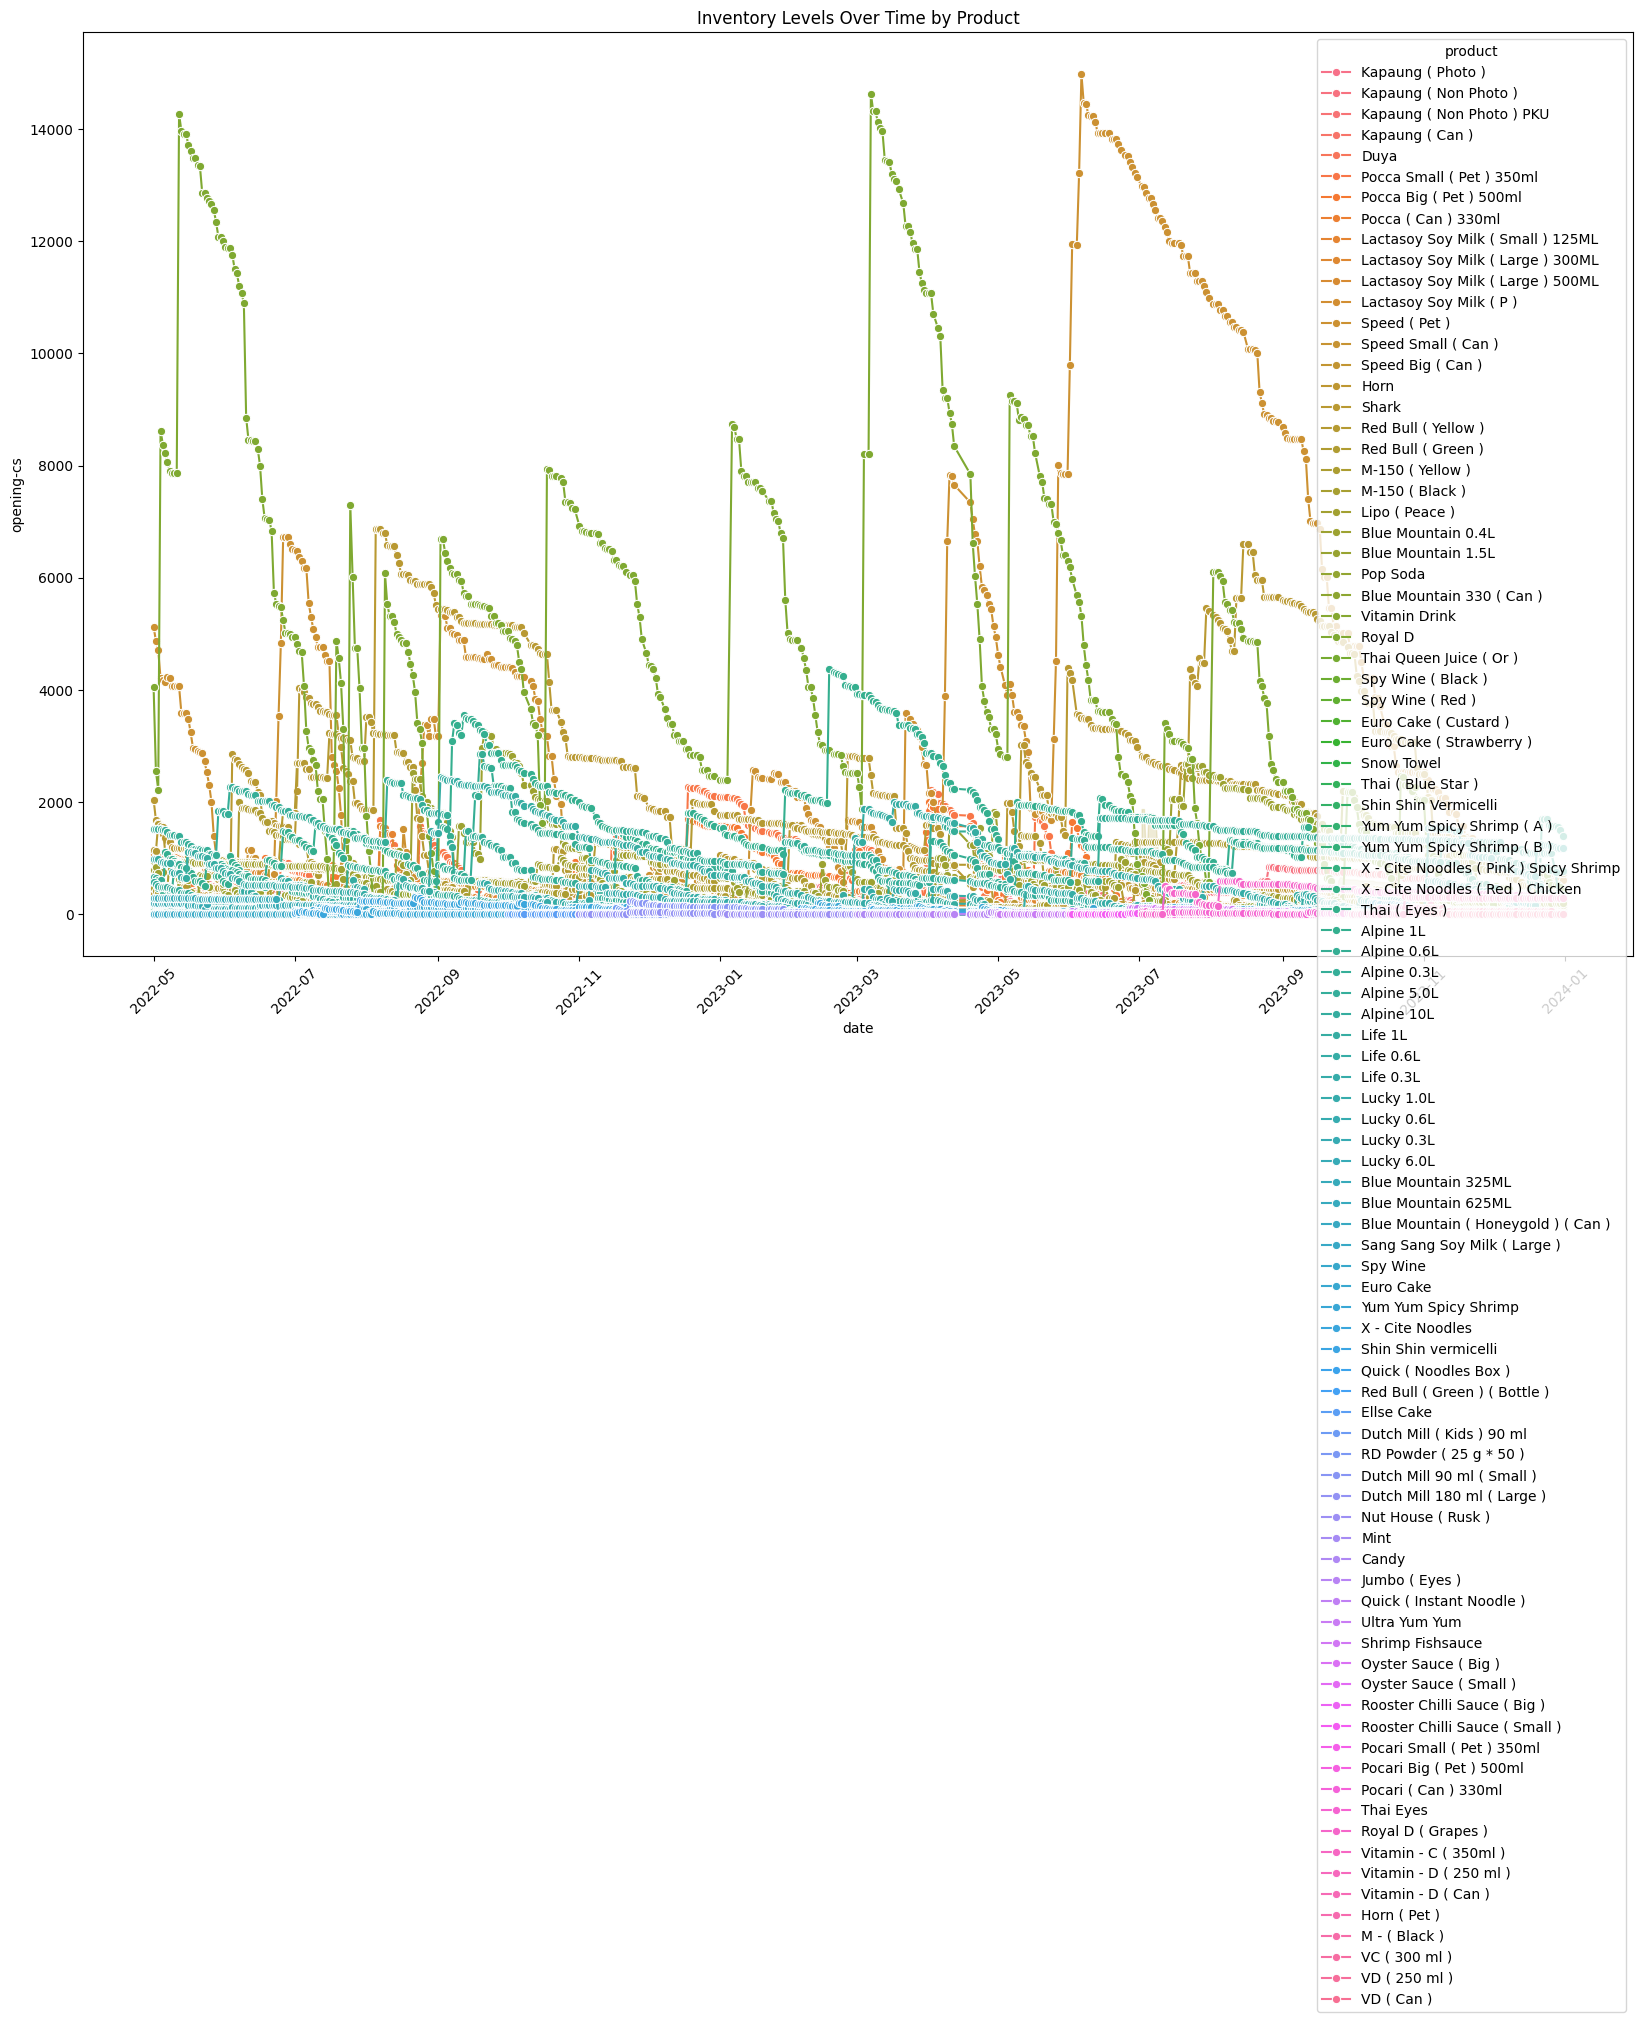

In [24]:
# Plot inventory levels over time for each product
plt.figure(figsize=(20, 12))
sns.lineplot(x='date', y='opening-cs', hue='product', data=df, marker='o')
plt.title('Inventory Levels Over Time by Product')
plt.xticks(rotation=45)
plt.show()

In [25]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [26]:
features = df.drop(['product','date','received-pcs','foc-pcs', 'tso-cs','damage-cs','closing-cs', 'sales-cs'], axis=1)
target = df['closing-cs']

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, chi2

uni = SelectKBest(score_func = f_regression, k = 10)
fit = uni.fit(features, target)

features.columns[fit.get_support(indices=True)].tolist()

['opening-cs',
 'opening-pcs',
 'received-cs',
 'foc-cs',
 'damage-pcs',
 'closing-pcs',
 'product_id',
 'category',
 'month',
 'day']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                  test_size = 0.05, 
                                                  random_state=22)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
features

,opening-cs,opening-pcs,received-cs,sales-pcs,foc-cs,damage-pcs,closing-pcs,product_id,category,year,month,day
0,0,0,0,0,0,0,0,1,1,2022,5,1
1,4,0,0,0,0,0,0,2,1,2022,5,1
2,28,0,0,0,0,0,0,3,1,2022,5,1
3,8,0,0,0,0,0,0,4,1,2022,5,1
4,0,0,0,0,0,0,0,5,1,2022,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30761,5,0,0,0,0,0,0,74,5,2023,12,31
30762,5,0,0,0,0,0,0,84,5,2023,12,31
30763,17,0,0,0,0,0,0,91,0,2023,12,31
30764,3,0,0,0,0,0,0,92,0,2023,12,31


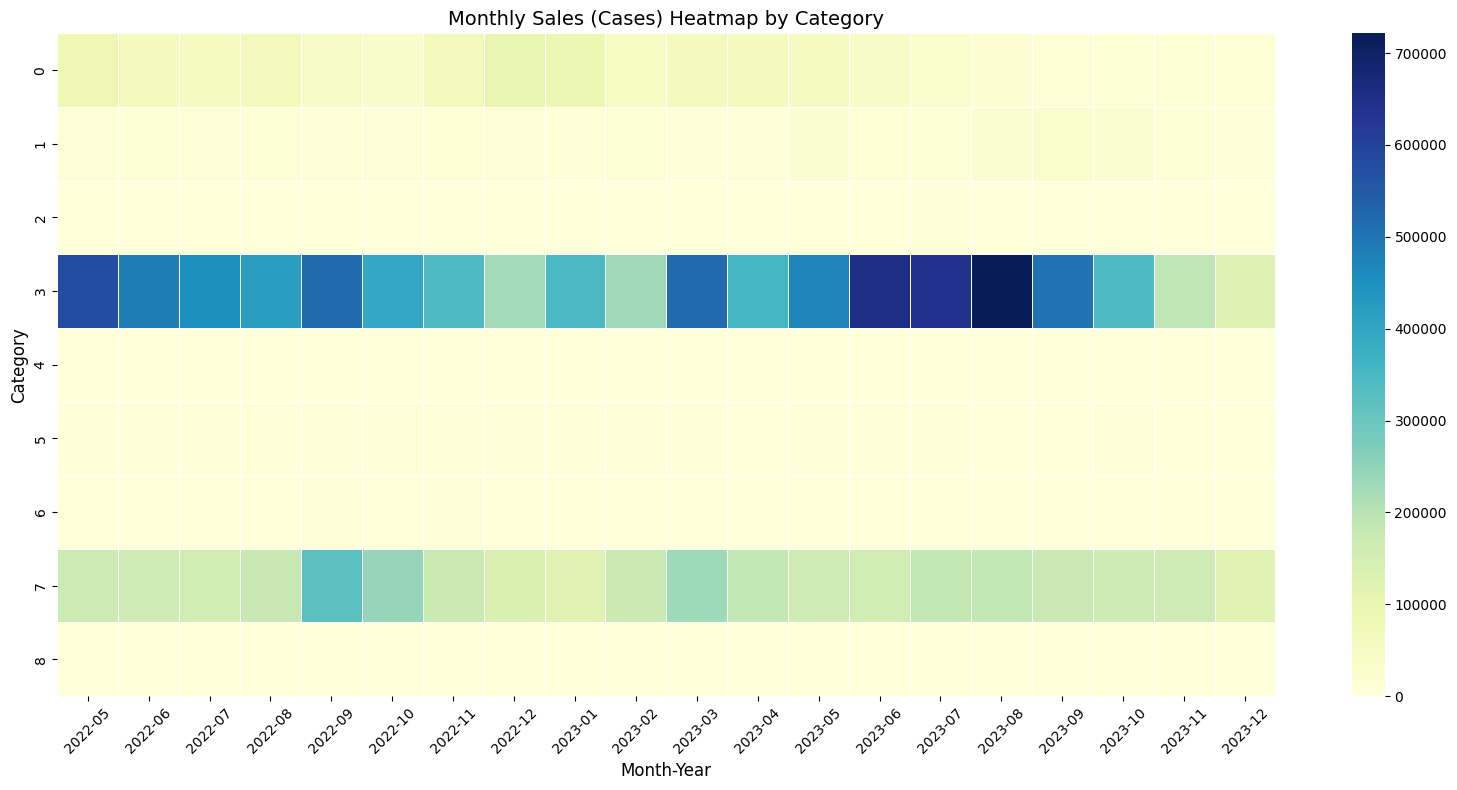

In [30]:
import seaborn as sns

df['month_year'] = df['date'].dt.to_period('M')


# Pivot table for sales (cases and pieces) by category and month
sales_heatmap_data = df.pivot_table(
    index='category', 
    columns='month_year', 
    values='closing-cs', 
    aggfunc='sum'
)

# Replace NaN with 0 for visualization
sales_heatmap_data = sales_heatmap_data.fillna(0)

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(sales_heatmap_data, cmap='YlGnBu', annot=False, fmt='.0f', linewidths=.5)
plt.title('Monthly Sales (Cases) Heatmap by Category', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
df.to_csv('preprocessed2.csv', index=False)

In [32]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [33]:
Linear_train_prediction = linear_model.predict(X_train)


In [34]:
Linear_test_prediction = linear_model.predict(X_test)


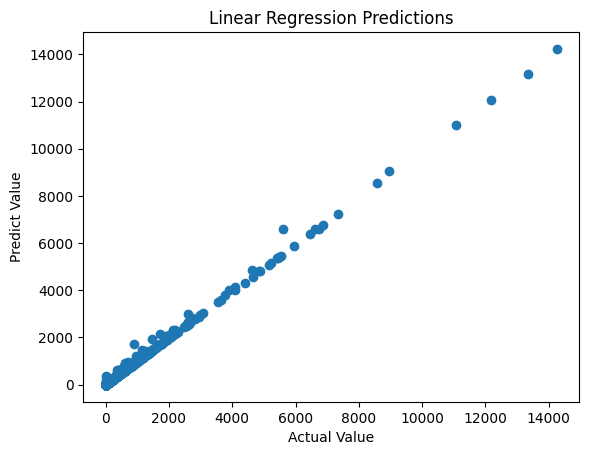

In [35]:
plt.scatter(y_test, Linear_test_prediction)
plt.title("Linear Regression Predictions")
plt.xlabel("Actual Value")
plt.ylabel("Predict Value")
plt.show()

In [36]:
#R2 error
linear_score = metrics.r2_score(y_test, Linear_test_prediction)

#mean absolute error
linear_MAE_score = metrics.mean_absolute_error(y_test, Linear_test_prediction)

#mean squared error
linear_MSE_score = metrics.mean_squared_error(y_test, Linear_test_prediction)

#root mean squared error 
linear_root_MSE_score = np.sqrt(linear_MSE_score)

print("Linear Model Evaluation")
print("R2 Score : ", linear_score)
print("Mean Absolute Error : ", linear_MAE_score)
print("Mean Squared Error : ", linear_MSE_score)
print("Root Mean Squared Error:", linear_root_MSE_score )

Linear Model Evaluation
R2 Score :  0.9977964916394365
Mean Absolute Error :  15.467843743904373
Mean Squared Error :  2470.996016114776
Root Mean Squared Error: 49.70911401458264


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

sc = StandardScaler()

svm_X_train = sc.fit_transform(X_train)
svm_X_test = sc.fit_transform(X_test)


SVR_Regression = SVR(kernel='linear').fit(svm_X_train,y_train)

In [38]:
SVR_score = SVR_Regression.score(svm_X_train,y_train)
print(SVR_score)

#Prediction on training data
SVR_train_prediction = SVR_Regression.predict(svm_X_train)


0.9980650310082321


In [39]:
#Prediction on testing data
SVR_test_prediction = SVR_Regression.predict(svm_X_test)

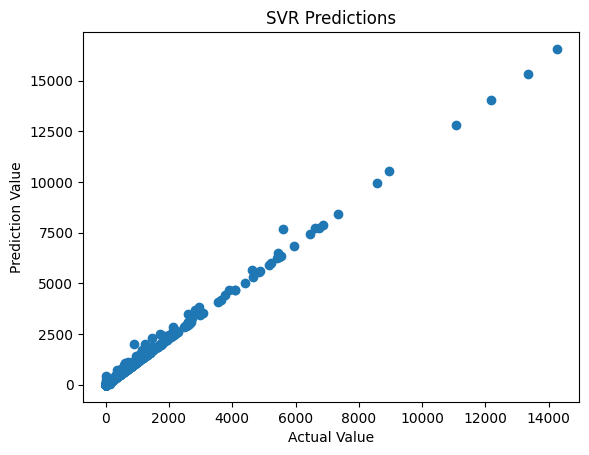

In [40]:
plt.scatter(y_test, SVR_test_prediction)
plt.xlabel("Actual Value")
plt.ylabel("Prediction Value")
plt.title("SVR Predictions")
plt.show()

In [41]:
#SVM Regression

#r2 Error
SVR_r2_score = metrics.r2_score(y_test, SVR_test_prediction)

#Mean Absolute Error
SVR_mean_absolute_error = metrics.mean_absolute_error(y_test, SVR_test_prediction)

#mean squared error
SVR_MSE_score = metrics.mean_squared_error(y_test, SVR_test_prediction)

#root mean squared error 
SVR_root_MSE_score = np.sqrt(SVR_MSE_score)


print("SVM Regression Model Evaluation")
print("R2 Score: ",SVR_r2_score)
print("SVR Mean Absolute Error:",SVR_mean_absolute_error)
print("SVR Squared Error:",SVR_MSE_score)
print("Root Mean Squared Error:", SVR_root_MSE_score )

SVM Regression Model Evaluation
R2 Score:  0.9654466305249885
SVR Mean Absolute Error: 71.13832809708481
SVR Squared Error: 38747.862202012475
Root Mean Squared Error: 196.84476676308282


In [42]:
from sklearn.tree import DecisionTreeRegressor 


DecisionTree_Regression = DecisionTreeRegressor(random_state=0)

#Fitting Model 
DecisionTree_Regression.fit(X_train, y_train)

#Prediction on training data
DT_train_prediction = DecisionTree_Regression.predict(X_train)


#Prediction on test data
DT_test_prediction = DecisionTree_Regression.predict(X_test)


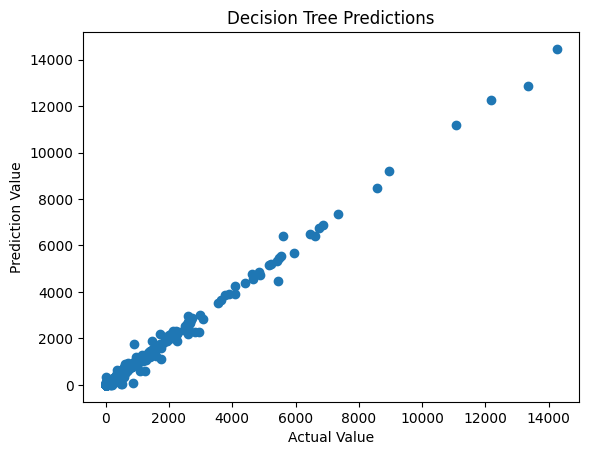

In [43]:
plt.scatter(y_test, DT_test_prediction)
plt.xlabel("Actual Value")
plt.ylabel("Prediction Value")
plt.title("Decision Tree Predictions")
plt.show()

In [44]:
score_random_tree = metrics.r2_score(y_test, DT_test_prediction)

#mean absolute error
MAE_score_random_tree = metrics.mean_absolute_error(y_test, DT_test_prediction)

#mean squared error
MSE_score_random_tree = metrics.mean_squared_error(y_test, DT_test_prediction)

#root mean squared error 
DT_root_MSE_score = np.sqrt(MSE_score_random_tree)


print("Random Tree Regression")
print("R2 Score:", score_random_tree)
print("Mean Absolute Error:", MAE_score_random_tree)
print("Mean Square Error:", MSE_score_random_tree)
print("Root Mean Squared Error:", DT_root_MSE_score )

Random Tree Regression
R2 Score: 0.9949463555494169
Mean Absolute Error: 18.478232618583498
Mean Square Error: 5667.115009746589
Root Mean Squared Error: 75.28024315679771


In [45]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model = RandomForestRegressor(random_state=42)
RandomForest_model.fit(X_train, y_train)

#Prediction on training data
RF_train_prediction = RandomForest_model.predict(X_train)


#Prediction on test data
RF_test_prediction = RandomForest_model.predict(X_test)



In [46]:
score_random_forest = metrics.r2_score(y_test, DT_test_prediction)

#mean absolute error
MAE_score_random_forest = metrics.mean_absolute_error(y_test, DT_test_prediction)

#mean squared error
MSE_score_random_forest= metrics.mean_squared_error(y_test, DT_test_prediction)

#root mean squared error 
DT_root_MSE_score = np.sqrt(MSE_score_random_tree)


print("Random Forest Regression")
print("R2 Score:", score_random_tree)
print("Mean Absolute Error:", MAE_score_random_forest)
print("Mean Absolute Error:", MSE_score_random_forest)
print("Root Mean Squared Error:", DT_root_MSE_score )

Random Forest Regression
R2 Score: 0.9949463555494169
Mean Absolute Error: 18.478232618583498
Mean Absolute Error: 5667.115009746589
Root Mean Squared Error: 75.28024315679771


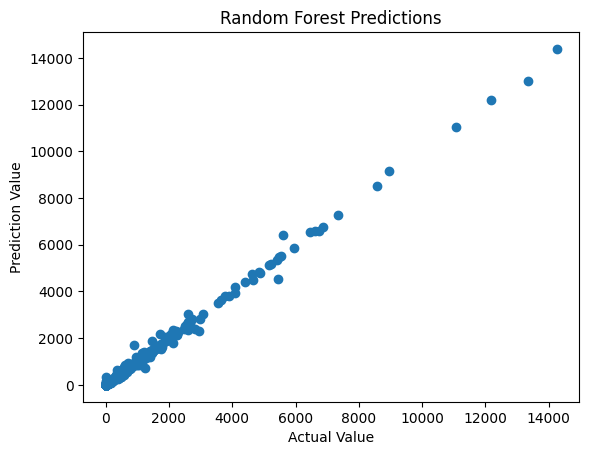

In [47]:
plt.scatter(y_test, RF_test_prediction)
plt.xlabel("Actual Value")
plt.ylabel("Prediction Value")
plt.title("Random Forest Predictions")
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Knn Model with k = 5
KNN_Regression = KNeighborsClassifier(n_neighbors = 5)

# train the model
KNN_Regression.fit(X_train, y_train.astype('int'))

KNeighborsClassifier()

In [49]:
#Prediction on training data
KNN_data_prediction = KNN_Regression.predict(X_train)

#Prediction on testing data
KNN_test_prediction = KNN_Regression.predict(X_test)


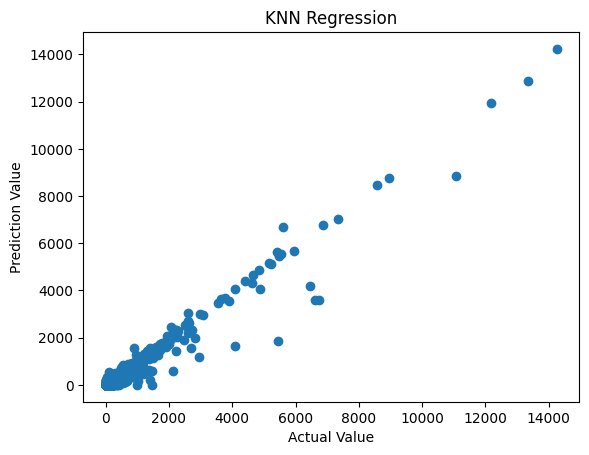

In [50]:
plt.scatter(y_test, KNN_test_prediction)
plt.title("KNN Regression")
plt.xlabel("Actual Value")
plt.ylabel("Prediction Value")
plt.show()

In [51]:
#KNN Regression

#R2 Error
r2_score_knn = metrics.r2_score(y_test, KNN_test_prediction)

#mean absolute error
KNN_mean_absolute_error = metrics.mean_absolute_error(y_test, KNN_test_prediction)

#mean squared error
KNN_MSE_score = metrics.mean_squared_error(y_test, KNN_test_prediction)

#root mean squared error 
KNN_root_MSE_score = np.sqrt(KNN_MSE_score)


print("KNN Model Evaluation")
print("R2 Score : ", r2_score_knn)
print("Mean Absolute Error: ", KNN_mean_absolute_error)
print("Mean Squared Error: ", KNN_MSE_score)
print("Root Mean Squared Error:", KNN_root_MSE_score )

KNN Model Evaluation
R2 Score :  0.9527129140589661
Mean Absolute Error:  69.2735542560104
Mean Squared Error:  53027.34632878492
Root Mean Squared Error: 230.2766734360754


In [52]:
features

,opening-cs,opening-pcs,received-cs,sales-pcs,foc-cs,damage-pcs,closing-pcs,product_id,category,year,month,day
0,0,0,0,0,0,0,0,1,1,2022,5,1
1,4,0,0,0,0,0,0,2,1,2022,5,1
2,28,0,0,0,0,0,0,3,1,2022,5,1
3,8,0,0,0,0,0,0,4,1,2022,5,1
4,0,0,0,0,0,0,0,5,1,2022,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30761,5,0,0,0,0,0,0,74,5,2023,12,31
30762,5,0,0,0,0,0,0,84,5,2023,12,31
30763,17,0,0,0,0,0,0,91,0,2023,12,31
30764,3,0,0,0,0,0,0,92,0,2023,12,31


In [41]:

#df.to_csv('exported_dataset.csv', index=False)

In [42]:
opening_cs = 147
opening_pcs = 0
received_cs = 0
received_pcs = 0
sales_cs = 0
sales_pcs = 0
foc_cs= 0
foc_pcs = 0

damage_pcs = 0
damage_cs = 0
closing_pcs = 0
product_id =  2
year = 2023
month = 11
day = 24
category = 1


input_data = [[opening_cs, opening_pcs,received_cs,sales_pcs,foc_cs,damage_pcs,closing_pcs,category,product_id , year, month, day]] 

predicted_closing_cs = linear_model.predict(input_data)
predicted_closing_cs2 = KNN_Regression.predict(input_data)
predicted_closing_cs3 = RandomForest_model.predict(input_data)
predicted_closing_cs4 = DecisionTree_Regression.predict(input_data)
predicted_closing_cs5 = SVR_Regression.predict(input_data)

print(f'Predicted Linear Stock: {predicted_closing_cs[0]}')
print(f'Predicted KNN Stock: {predicted_closing_cs2[0]}')
print(f'Predicted RandomTree Stock: {predicted_closing_cs3[0]}')
print(f'Predicted DecisionTree Stock: {predicted_closing_cs4[0]}')
print(f'Predicted SVR Stock: {predicted_closing_cs5[0]}')

Predicted Linear Stock: 183172.94224552214
Predicted KNN Stock: 14132
Predicted RandomTree Stock: 13986.89
Predicted DecisionTree Stock: 13971.0
Predicted SVR Stock: 180419.28927834425


In [43]:
from joblib import dump
import os

# Create example models

# Store models in a dictionary
models = {
    "RandomForest": RandomForest_model,
    "DecisionTree": DecisionTree_Regression,
    "SVM": linear_model,
    "KNN": KNN_Regression,
    "SVR": SVR_Regression
}

# Save the dictionary
dump(models, "multiple_models.joblib")



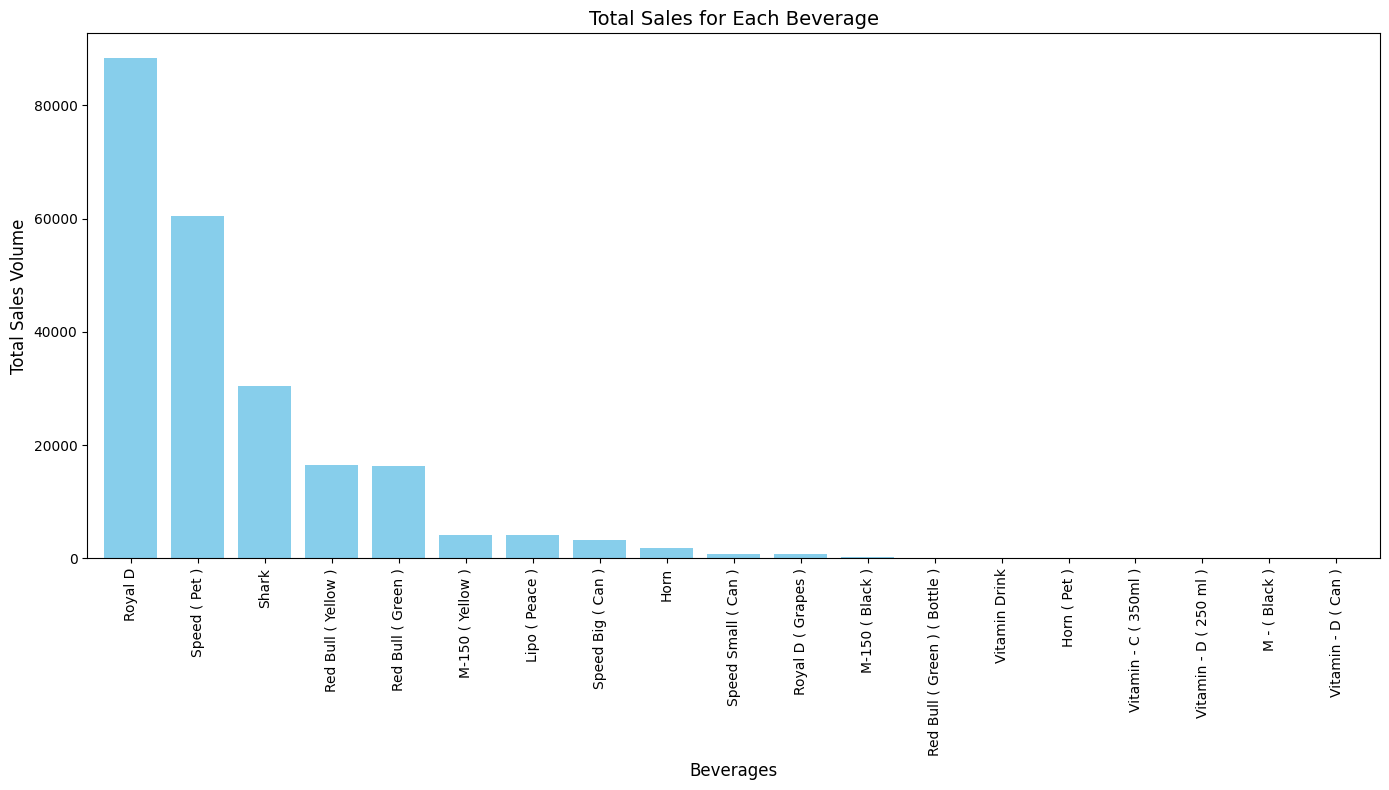

In [50]:
category_3_sales = df[df['category'] == 3]

# Aggregate total sales (cases and pieces) by product within Category 3
category_3_product_sales = category_3_sales.groupby('product')[['sales-cs', 'sales-pcs']].sum()

# Add a total sales column for visualization
category_3_product_sales['total_sales'] = category_3_product_sales['sales-cs'] + category_3_product_sales['sales-pcs']

# Sort products by total sales within Category 3
category_3_product_sales_sorted = category_3_product_sales.sort_values('total_sales', ascending=False)

# Plot total sales for each product in Category 3
plt.figure(figsize=(14, 8))
category_3_product_sales_sorted['total_sales'].plot(kind='bar', width=0.8, color='skyblue')
plt.title('Total Sales for Each Beverage', fontsize=14)
plt.xlabel('Beverages', fontsize=12)
plt.ylabel('Total Sales Volume', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()